### Preamble
Scrapy Packet Manipulation

In [149]:
from scapy.all import sniff
from scapy.all import rdpcap
import matplotlib.pyplot as plt

In [150]:
packets = sniff(count=25)

print(type(packets))
print(f'Found {len(packets)} packets.')
print(packets)

<class 'scapy.plist.PacketList'>
Found 25 packets.
<Sniffed: TCP:10 UDP:13 ICMP:0 Other:2>


In [151]:
first_packet = packets[0]
print(type(first_packet))

<class 'scapy.layers.l2.Ether'>


In [152]:
for packet in packets[:5]:
    print("\n" + "=" * 50)
    print(f"Packet {packets.index(packet) + 1}:")
    print("=" * 50)
    packet.show()


Packet 1:
###[ Ethernet ]###
  dst       = 0e:12:f6:8c:ab:5e
  src       = 20:f3:75:b3:81:c0
  type      = IPv4
###[ IP ]###
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 611
     id        = 44423
     flags     = DF
     frag      = 0
     ttl       = 53
     proto     = tcp
     chksum    = 0x361e
     src       = 174.129.240.188
     dst       = 192.168.0.9
     \options   \
###[ TCP ]###
        sport     = https
        dport     = 63373
        seq       = 129017779
        ack       = 521311485
        dataofs   = 8
        reserved  = 0
        flags     = PA
        window    = 308
        chksum    = 0xd2eb
        urgptr    = 0
        options   = [('NOP', None), ('NOP', None), ('Timestamp', (1831173985, 2575796055))]
###[ Raw ]###
           load      = b'\x17\x03\x03\x02*\xd7\x8aW>\xa7\xf6\xaat\x1d\x89\xc1&\xc4\x19@\x14$z.&\xdd\x87f\x0fy\x0f\x93\x17bdO\xfaXi=\xcd^>_uX\x8d{/\xca\xa86~{\x1dw\xe4%\x9f\xb2z\xee^\xd5\x8f\xdd\xb5m\x0e\x16A\xc7;\xd

### Statistical Analysis

In [153]:
packets = rdpcap('packets.pcap')

print(f'Found {len(packets)} packets.')

Found 62 packets.


In [154]:
import pandas as pd
from scapy.all import rdpcap, IP, TCP, UDP

packets = rdpcap('packets.pcap')

packet_rows = []

for packet in packets:
    try:
        if packet.haslayer(IP):
            src_ip = packet[IP].src
            dst_ip = packet[IP].dst
            
            if packet.haslayer(TCP):
                src_port = packet[TCP].sport
                dst_port = packet[TCP].dport
                protocol = "TCP"
                payload = bytes(packet[TCP].payload) if packet[TCP].payload else b''
            elif packet.haslayer(UDP):
                src_port = packet[UDP].sport
                dst_port = packet[UDP].dport
                protocol = "UDP"
                payload = bytes(packet[UDP].payload) if packet[UDP].payload else b''
            else:
                src_port = None
                dst_port = None
                protocol = f"Other ({packet[IP].proto})"
                payload = b''
            
            payload_length = len(packet)
            timestamp = float(packet.time)
            
            packet_rows.append({
                'src_ip': src_ip,
                'dst_ip': dst_ip,
                'src_port': src_port, 
                'dst_port': dst_port,
                'protocol': protocol,
                'payload_length': payload_length,
                'payload': payload,  
                'timestamp': timestamp
            })
    except Exception as e:
        print(f"Skipping packet due to error: {e}")
        continue

packet_data = pd.DataFrame(packet_rows)
packet_data.head()

,src_ip,dst_ip,src_port,dst_port,protocol,payload_length,payload,timestamp
0,10.1.10.53,84.54.22.33,53,53,UDP,975,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,1.532199e+09
1,84.54.22.33,10.1.10.53,53,53,UDP,98,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,1.532199e+09
2,10.1.10.53,84.54.22.33,53,53,UDP,989,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,1.532199e+09
3,84.54.22.33,10.1.10.53,53,53,UDP,98,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,1.532199e+09
4,10.1.10.53,84.54.22.33,53,53,UDP,1026,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,1.532199e+09


In [155]:
import json
print(json.dumps(json.loads(packet_data.iloc[0].to_json()), indent=2))


{
  "src_ip": "10.1.10.53",
  "dst_ip": "84.54.22.33",
  "src_port": 53,
  "dst_port": 53,
  "protocol": "UDP",
  "payload_length": 975,
  "payload": "\u0000\f\u0001\u0000\u0000\u0001\u0000\u0000\u0000\u0000\u0000\u0000\u0006google\u0003com\u0000\u0000\u001c\u0000\u0001\ufffdPNG\r\n\u001a\n\u0000\u0000\u0000\rIHDR\u0000\u0000\u0001b\u0000\u0000\u0000\ufffd\b\u0006\u0000\u0000\u0000(\ufffdTR\u0000\u0000:\ufffdIDATx\ufffd\ufffd\t|T\ufffd\ufffd\ufffd\ufffd\ufffd;K\u0012\b;\b\ufffd\nE\ufffd\ufffd$\u0019\ufffd\ufffdZi\u07ea-\ufffd;N2\ufffd\ufffdV\ufffdV\ufffda\ufffdZ\u0011!\ufffd\ufffd\u0001\u073bik[\ufffd.ok\ufffde\ufffd\u0001\\\ufffd\ufffd]\ufffd-\ufffd\ufffd\ufffdd\ufffd\b\ufffd\b\ufffd\ufffdg\ufffd\ufffd\ufffd<\ufffd\ufffdL\u0012\ufffd$3wf\ufffd\ufffd\u0002<_\r\ufffdY\ufffdr\ufffd\ufffdy\ufffd\ufffd\ufffd\u001c\r\u0018\ufffd8c\ufffdew\r\u001e\ufffd\ufffd\ufffd\ufffd\u0013\ufffdiaK\ufffd\ufffd\ufffd\ufffdu}\u0172w\ufffdd\ufffd\ufffd\u0015\ufffd\"`\u0006:\u0013\ufffd\u000b\ufffd\f\u0016\u

#### Statistics

In [156]:
print('Unique source IPs: \n', packet_data['src_ip'].unique())
print('Unique destination IPs: \n', packet_data['dst_ip'].unique())

Unique source IPs: 
 ['10.1.10.53' '84.54.22.33' '75.75.75.75']
Unique destination IPs: 
 ['84.54.22.33' '10.1.10.53' '75.75.75.75']


In [157]:
src_ip_frequency = packet_data['src_ip'].value_counts()
dst_ip_frequency = packet_data['dst_ip'].value_counts()

frequency_df = pd.DataFrame({
    'src_ip': src_ip_frequency,
    'dst_ip': dst_ip_frequency
})

frequency_df

,src_ip,dst_ip
10.1.10.53,31,31
84.54.22.33,29,29
75.75.75.75,2,2


In [158]:
most_frequent_src_ip = src_ip_frequency.idxmax()

frequent_src_records = packet_data[packet_data['src_ip'] == most_frequent_src_ip]
print('Most frequent source IP:', most_frequent_src_ip)

most_frequent_dst_ip = frequent_src_records['dst_ip'].value_counts().idxmax()
print(f'Most frequent destination IP for {most_frequent_src_ip}: {most_frequent_dst_ip}')

dest_ports = frequent_src_records['dst_port'].unique()
print(f'Destination Ports from {most_frequent_src_ip}: {dest_ports}')

origin_ports = frequent_src_records['src_port'].unique()
print(f'Origin ports from {most_frequent_dst_ip}: {origin_ports}')

Most frequent source IP: 10.1.10.53
Most frequent destination IP for 10.1.10.53: 84.54.22.33
Destination Ports from 10.1.10.53: [53]
Origin ports from 84.54.22.33: [   53 15812 23903]


El puerto más común es el `53`. 

Dicho puerto se utiliza para servicios del Sistema de Nombres de Dominio (DNS). DNS es un protocolo que traduce nombres de dominio legibles por humanos (como example.com) en direcciones IP que las computadoras utilizan para identificarse entre sí en la red.

Es probable que se trate de un servidor DNS que maneja solicitudes de resolución de nombres. Este patrón es típico del tráfico DNS donde los clientes envían solicitudes a un servidor DNS, y el servidor envía respuestas de vuelta.

Source IP vs Total Payload

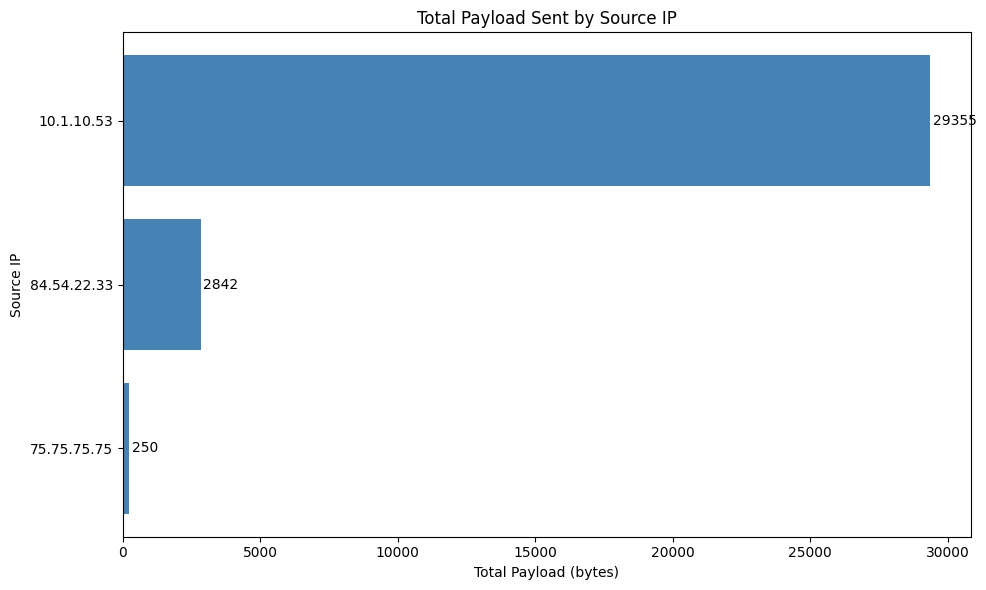

In [159]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(src_ip_payload['src_ip'], src_ip_payload['payload_length'], color='steelblue')

# Add labels and title
plt.xlabel('Total Payload (bytes)')
plt.ylabel('Source IP')
plt.title('Total Payload Sent by Source IP')

# Add text labels to the bars
for i, v in enumerate(src_ip_payload['payload_length']):
    plt.text(v + 100, i, str(v), va='center')

# Adjust layout and save
plt.tight_layout()
plt.savefig('src_ip_payload.png', dpi=300)
plt.show()

Destination IP vs Total Payload

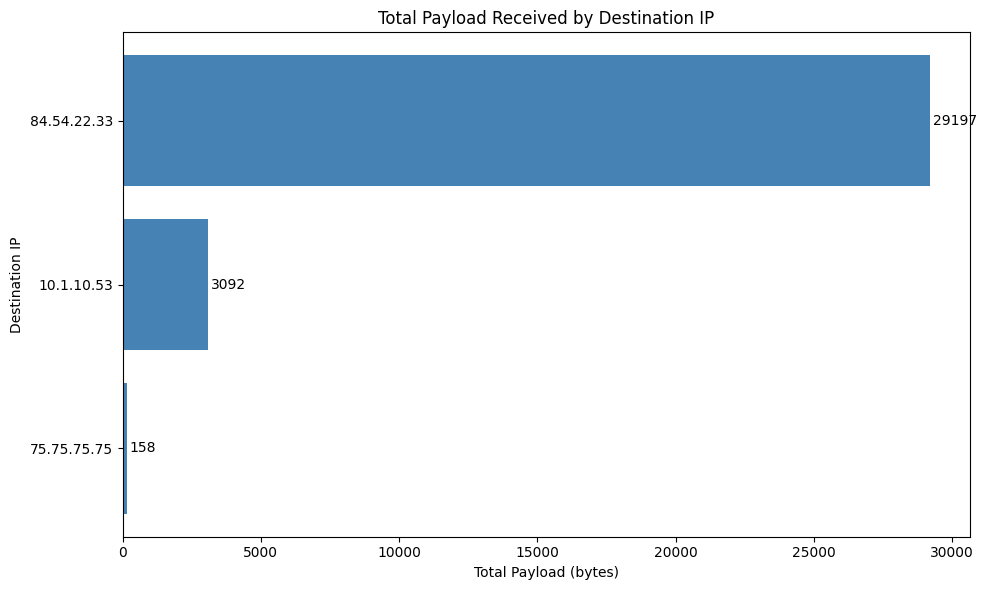

In [160]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(dst_ip_payload['dst_ip'], dst_ip_payload['payload_length'], color='steelblue')
plt.xlabel('Total Payload (bytes)')
plt.ylabel('Destination IP')
plt.title('Total Payload Received by Destination IP')

for i, v in enumerate(dst_ip_payload['payload_length']):
    plt.text(v + 100, i, str(v), va='center')

plt.tight_layout()
plt.savefig('dst_ip_payload.png', dpi=300)
plt.show()

Source Port vs Total Payload

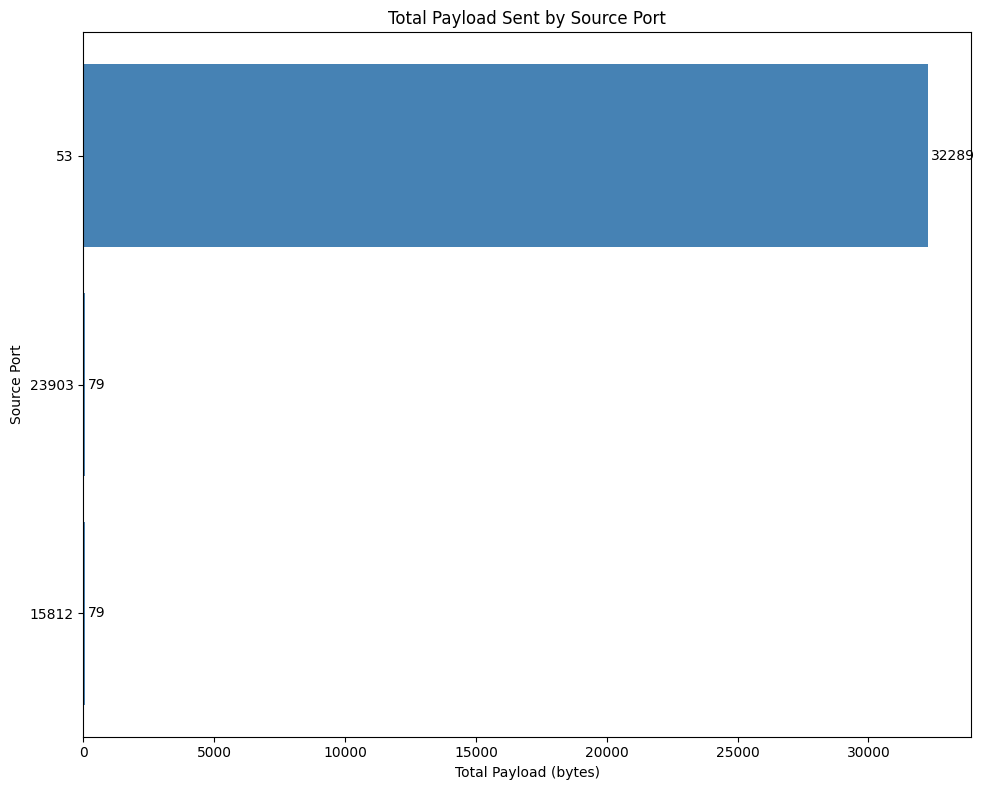

In [161]:
import matplotlib.pyplot as plt

src_port_payload = packet_data.groupby('src_port')['payload_length'].sum().reset_index()
src_port_payload = src_port_payload.sort_values('payload_length', ascending=True)
src_port_payload['src_port'] = src_port_payload['src_port'].astype(str)

plt.figure(figsize=(10, 8))
plt.barh(src_port_payload['src_port'], src_port_payload['payload_length'], color='steelblue')
plt.xlabel('Total Payload (bytes)')
plt.ylabel('Source Port')
plt.title('Total Payload Sent by Source Port')

for i, v in enumerate(src_port_payload['payload_length']):
    plt.text(v + 100, i, str(v), va='center')

plt.tight_layout()
plt.savefig('src_port_payload.png', dpi=300)
plt.show()

Destination Port vs Total Payload

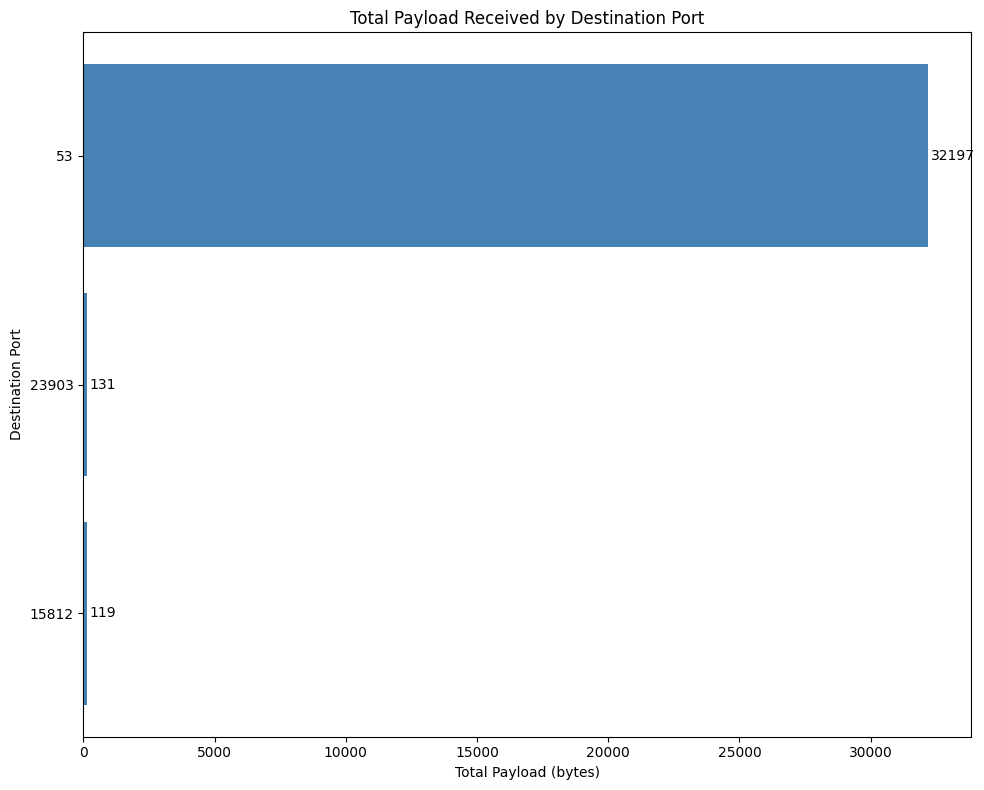

In [162]:
import matplotlib.pyplot as plt

dst_port_payload = packet_data.groupby('dst_port')['payload_length'].sum().reset_index()
dst_port_payload = dst_port_payload.sort_values('payload_length', ascending=True)
dst_port_payload['dst_port'] = dst_port_payload['dst_port'].astype(str)

plt.figure(figsize=(10, 8))
plt.barh(dst_port_payload['dst_port'], dst_port_payload['payload_length'], color='steelblue')
plt.xlabel('Total Payload (bytes)')
plt.ylabel('Destination Port')
plt.title('Total Payload Received by Destination Port')

for i, v in enumerate(dst_port_payload['payload_length']):
    plt.text(v + 100, i, str(v), va='center')

plt.tight_layout()
plt.savefig('dst_port_payload.png', dpi=300)
plt.show()

e. Time vs Payload for most frequent source IP

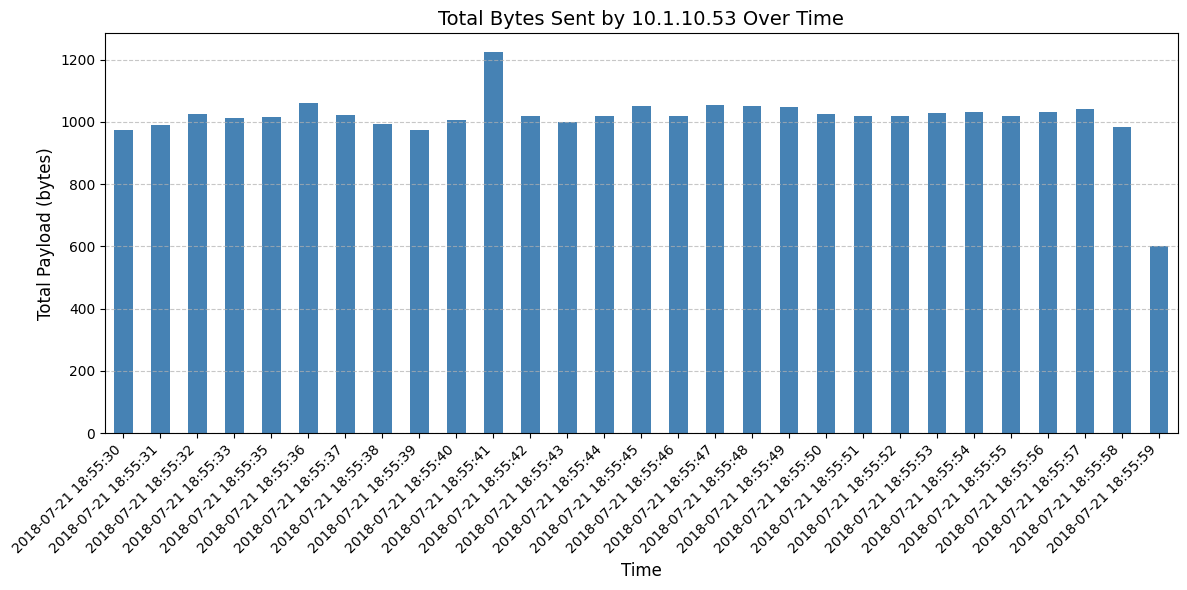

In [163]:
import matplotlib.pyplot as plt

most_frequent_src_ip = packet_data['src_ip'].value_counts().index[0]

most_freq_ip_data = packet_data[packet_data['src_ip'] == most_frequent_src_ip].copy()
most_freq_ip_data['time'] = pd.to_datetime(most_freq_ip_data['timestamp'], unit='s')

time_span = (most_freq_ip_data['timestamp'].max() - most_freq_ip_data['timestamp'].min())
if time_span > 3600: 
    freq = '10min'  
elif time_span > 600:  
    freq = '1min'
elif time_span > 60:  
    freq = '10s'
else:
    freq = '1s'

most_freq_ip_data['time_group'] = most_freq_ip_data['time'].dt.floor(freq)

grouped_data = most_freq_ip_data.groupby('time_group')['payload_length'].sum()

plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', color='steelblue')

plt.title(f'Total Bytes Sent by {most_frequent_src_ip} Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Payload (bytes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('payload_over_time.png', dpi=300)
plt.show()

El análisis del tráfico de red revela que la dirección IP `10.1.10.53` está enviando una gran cantidad de datos, aproximadamente 30 mil bytes, hacia la IP `84.54.22.33`, utilizando principalmente el puerto 53, que es típico para el tráfico DNS. Este volumen de datos, junto con un pico de 12,223 bytes en un solo segundo a las 18:55:41, resulta inusual para consultas DNS estándar, las cuales normalmente involucran paquetes pequeños de pocos cientos de bytes. 

La comunicación constante de 800 a 1000 bytes por segundo, combinada con este pico, sugiere que podría estar ocurriendo algo más allá de simples consultas DNS, como un posible caso de DNS tunneling, una técnica que codifica datos en solicitudes DNS para transferir información de manera encubierta. Este comportamiento no es común para el tráfico DNS típico y podría indicar una actividad maliciosa, como la exfiltración de datos o una comunicación con un servidor de comando y control. 



In [164]:
# a. DF with only connections from most frequent source IP
src_ip_frequency = packet_data['src_ip'].value_counts()
most_frequent_src_ip = src_ip_frequency.idxmax()  # 10.1.10.53
df_most_frequent_ip = packet_data[packet_data['src_ip'] == most_frequent_src_ip]

df_most_frequent_ip.head()


,src_ip,dst_ip,src_port,dst_port,protocol,payload_length,payload,timestamp
0,10.1.10.53,84.54.22.33,53,53,UDP,975,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,1.532199e+09
2,10.1.10.53,84.54.22.33,53,53,UDP,989,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,1.532199e+09
4,10.1.10.53,84.54.22.33,53,53,UDP,1026,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,1.532199e+09
6,10.1.10.53,84.54.22.33,53,53,UDP,1012,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,1.532199e+09
8,10.1.10.53,84.54.22.33,53,53,UDP,1017,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,1.532199e+09


In [165]:
# b. New DF with columns src, dst and sum of payload grouped by dst
df_grouped = df_most_frequent_ip[['src_ip', 'dst_ip', 'payload', 'payload_length']].rename(
    columns={'src_ip': 'src', 'dst_ip': 'dst'}
).groupby('dst').agg({'src': 'first', 'payload_length': 'sum', 'payload': list})


df_grouped.head()


,src,payload_length,payload
dst,,,
75.75.75.75,10.1.10.53,158,[b'\xda\xd1\x01\x00\x00\x01\x00\x00\x00\x00\x0...
84.54.22.33,10.1.10.53,29197,[b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x0...


In [166]:

# c. Get the destination IP with most exchanged bytes with the most frequent IP
suspicious_ip = df_grouped['payload_length'].idxmax()  # 84.54.22.33

# d. Create DF with the conversation between the most frequent IP and the suspicious IP
conversation_df = packet_data[
    ((packet_data['src_ip'] == most_frequent_src_ip) & (packet_data['dst_ip'] == suspicious_ip)) |
    ((packet_data['src_ip'] == suspicious_ip) & (packet_data['dst_ip'] == most_frequent_src_ip))
].sort_values('timestamp')


conversation_df.head()


,src_ip,dst_ip,src_port,dst_port,protocol,payload_length,payload,timestamp
0,10.1.10.53,84.54.22.33,53,53,UDP,975,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,1.532199e+09
1,84.54.22.33,10.1.10.53,53,53,UDP,98,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,1.532199e+09
2,10.1.10.53,84.54.22.33,53,53,UDP,989,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,1.532199e+09
3,84.54.22.33,10.1.10.53,53,53,UDP,98,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,1.532199e+09
4,10.1.10.53,84.54.22.33,53,53,UDP,1026,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,1.532199e+09


In [167]:
# e. Get the payloads from the conversation DF and add them to an array
payloads_array = conversation_df['payload'].tolist()

# f. Show the content of the array
for i, payload in enumerate(payloads_array[:5]):  # Show first 5 for brevity
    print(f"Packet {i+1} payload prefix: {payload[:50]}")  # Show first 50 bytes

Packet 1 payload prefix: b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01\xef\xbf\xbdPNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01b'
Packet 2 payload prefix: b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01\xc0\x0c\x00\x1c\x00\x01\x00\x00\x01+\x00\x10&\x07\xf8\xb0@\x05\x08\x07\x00\x00'
Packet 3 payload prefix: b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01:\xef\xbf\xbdle:\xc7\xa9\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\x0c\xef\xbf\xbd'
Packet 4 payload prefix: b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01\xc0\x0c\x00\x1c\x00\x01\x00\x00\x01)\x00\x10&\x07\xf8\xb0@\x05\x08\x07\x00\x00'
Packet 5 payload prefix: b"\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01\xef\xbf\xbd\xef\xbf\xbd^n\xef\xbf\xbd''\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd"


In [168]:
def analyze_dns_payload(payload, packet_num):
    analysis = []
    suspicion_score = 0
    
    is_dns_query = payload.startswith(b'\x00\x0c\x01\x00')
    is_dns_response = payload.startswith(b'\x00\x0c\x81\x80')
    
    if is_dns_query:
        analysis.append(f"DNS Query for 'google.com'")
    elif is_dns_response:
        analysis.append(f"DNS Response for 'google.com'")
    else:
        analysis.append("Not a standard DNS packet")
        suspicion_score += 2
    
    signatures = {
        b'PNG\r\n\x1a\n': "PNG image file",
        b'JFIF': "JPEG image file",
        b'PK\x03\x04': "ZIP archive",
        b'%PDF': "PDF document",
        b'MZ': "Windows executable",
        b'GIF8': "GIF image",
        b'IHDR': "PNG image data chunk",
        b'IDAT': "PNG image data chunk",
        b'IEND': "PNG image end marker"
    }
    
    for sig, desc in signatures.items():
        if sig in payload:
            analysis.append(f"Contains {desc} signature")
            suspicion_score += 5 
            
    if len(payload) > 300:
        analysis.append(f"Unusually large DNS payload ({len(payload)} bytes)")
        suspicion_score += 3
    elif len(payload) > 100:
        analysis.append(f"Larger than normal DNS payload ({len(payload)} bytes)")
        suspicion_score += 1
    
    binary_patterns = sum(1 for b in payload if b > 127)
    binary_ratio = binary_patterns / len(payload) if payload else 0
    if binary_ratio > 0.3:
        analysis.append(f"High ratio of binary data ({binary_ratio:.2f})")
        suspicion_score += 2
    
    try:
        text_content = payload.decode('ascii', errors='ignore')
        text_sample = text_content.replace('\x00', '').strip()
        if len(text_sample) > 20: 
            preview = text_sample[:30] + "..." if len(text_sample) > 30 else text_sample
            analysis.append(f"Contains text data: '{preview}'")
            suspicion_score += 1
    except:
        pass
    
    return {
        "packet_num": packet_num,
        "analysis": analysis,
        "suspicion_score": suspicion_score,
        "payload_size": len(payload)
    }

analysis_results = []
for i, payload in enumerate(payloads_array):
    result = analyze_dns_payload(payload, i+1)
    analysis_results.append(result)

sorted_results = sorted(analysis_results, key=lambda x: x["suspicion_score"], reverse=True)

print("Top 10 Most Suspicious DNS Packets\n" + "="*70)
for result in sorted_results[:10]:
    print(f"Packet #{result['packet_num']} - Suspicion Score: {result['suspicion_score']}")
    print(f"Size: {result['payload_size']} bytes")
    print("Findings:")
    for finding in result["analysis"]:
        print(f"  - {finding}")
    print("-"*70)

print("\nOverall Analysis Summary\n" + "="*70)
total_packets = len(analysis_results)
suspicious_packets = sum(1 for r in analysis_results if r["suspicion_score"] > 3)
print(f"Total packets analyzed: {total_packets}")
print(f"Suspicious packets: {suspicious_packets} ({suspicious_packets/total_packets*100:.1f}%)")

png_packets = sum(1 for r in analysis_results if any("PNG" in a for a in r["analysis"]))
large_packets = sum(1 for r in analysis_results if r["payload_size"] > 300)

print(f"Packets containing PNG data: {png_packets}")
print(f"Unusually large packets: {large_packets}")

Top 10 Most Suspicious DNS Packets
Packet #1 - Suspicion Score: 21
Size: 933 bytes
Findings:
  - DNS Query for 'google.com'
  - Contains PNG image file signature
  - Contains PNG image data chunk signature
  - Contains PNG image data chunk signature
  - Unusually large DNS payload (933 bytes)
  - High ratio of binary data (0.66)
  - Contains text data: 'googlecomPNG

IHDR...'
----------------------------------------------------------------------
Packet #57 - Suspicion Score: 11
Size: 560 bytes
Findings:
  - DNS Query for 'google.com'
  - Contains PNG image end marker signature
  - Unusually large DNS payload (560 bytes)
  - High ratio of binary data (0.67)
  - Contains text data: 'googlecomw[y4Q9c}...'
----------------------------------------------------------------------
Packet #3 - Suspicion Score: 6
Size: 947 bytes
Findings:
  - DNS Query for 'google.com'
  - Unusually large DNS payload (947 bytes)
  - High ratio of binary data (0.67)
  - Contains text data: '

Se desarrolló un sistema de puntuación para identificar paquetes sospechosos basado en múltiples factores: tamaño del payload, presencia de firmas de archivos conocidos, patrones binarios inusuales y contenido de texto. Este enfoque permitió clasificar y ordenar los paquetes según su nivel de sospecha.

Los resultados muestran evidencia de exfiltración de datos mediante técnicas de DNS tunneling, donde se está transmitiendo una imagen PNG fragmentada a través de consultas DNS. Este comportamiento es altamente sospechoso porque: 1) los paquetes DNS tienen un tamaño anormalmente grande (933-1017 bytes cuando deberían ser mucho menores), 2) contienen firmas de archivo PNG y bloques de datos de imagen que no deberían estar presentes en tráfico DNS legítimo, 3) muestran una alta proporción de datos binarios (66-73%), y 4) las consultas siempre se dirigen al mismo dominio (google.com) con información no relacionada con resolución de nombres. Esta técnica es utilizada típicamente por atacantes para evadir controles de seguridad de red y extraer información de manera encubierta.